# Handwritten Digits Classifier

In [1]:
import pickle, gzip
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with gzip.open('mnist.pkl.gz', 'rb') as fd:
    train_set, valid_set, test_set = pickle.load(fd, encoding = 'latin')

In [3]:
train_set[1].size, valid_set[1].size, test_set[1].size

(50000, 10000, 10000)

In [4]:
type(train_set[0][0]), train_set[0][0].shape

(numpy.ndarray, (784,))

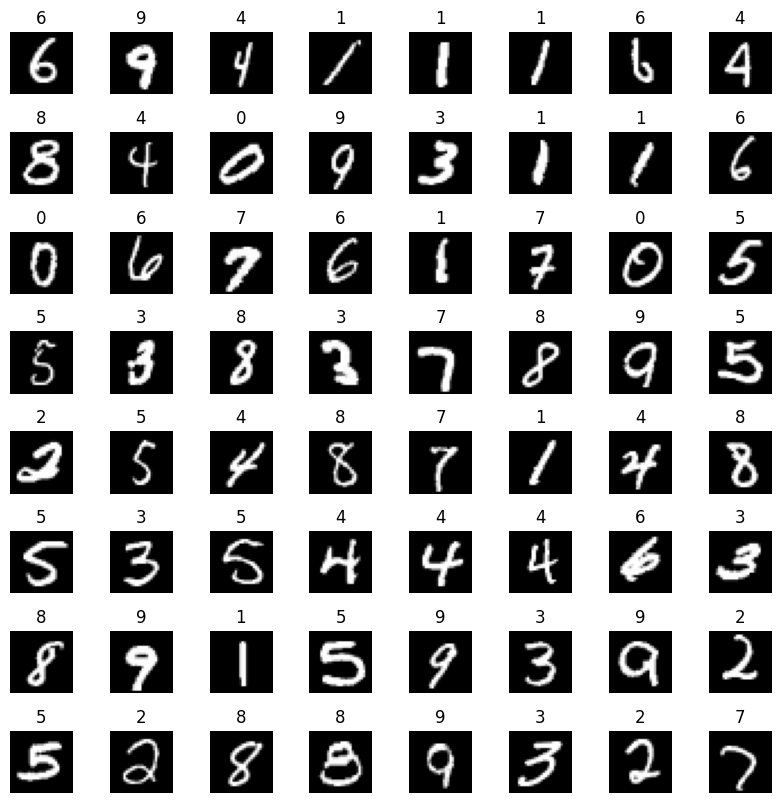

In [5]:
m,n = train_set[0].shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    img_reshaped = train_set[0][random_index].reshape((28,28))
    ax.imshow(img_reshaped, cmap='gray')
    ax.set_title(train_set[1][random_index])
    ax.set_axis_off()

In [6]:
X_train, Y_train = train_set[0], train_set[1]

In [7]:
X_train.shape, Y_train.shape

((50000, 784), (50000,))

In [8]:
def dense():
    weights = np.random.rand(784, 10) - 0.5
    bias = np.random.rand(1, 10) - 0.5
    return weights, bias

In [9]:
def activation(input):
    return np.argmax(input)

In [10]:
def accuracy(preds, true):
    # print(preds, true)
    return np.sum(preds == true) / true.size

## Online Training Approach

In [11]:
def online_training(X_train, Y_train, epochs, learning_rate):
    weights, bias = dense()
    history = []
    epoch = 1
    while epoch <= epochs:
        predictions = []
        for i in range(Y_train.shape[0]):
            activated_output = np.array([0 for _ in range(10)])
            expected_result = np.array([0 for _ in range(10)])
            output = np.dot(X_train[i], weights) + bias
            #print(output)
            
            Z = activation(output)
            predictions.append(Z)
            activated_output[Z] = 1
            #print(activated_output)
            
            expected_result[Y_train[i]] = 1
            #print(expected_result)
            
            weights = weights + np.dot(np.reshape(X_train[i], (784, 1)), (expected_result - activated_output).reshape((1,10))) * learning_rate
            bias = bias + (expected_result - activated_output) * learning_rate
        print(f"Epoch: {epoch}")
        score = accuracy(predictions, Y_train)
        history.append(score)
        print(f"Accuracy: {score}")
        epoch += 1
    return weights, bias, history

In [12]:
weights, bias, history = online_training(X_train, Y_train, 20, 0.01)

Epoch: 1
Accuracy: 0.84208
Epoch: 2
Accuracy: 0.87568
Epoch: 3
Accuracy: 0.8827
Epoch: 4
Accuracy: 0.88686
Epoch: 5
Accuracy: 0.8867
Epoch: 6
Accuracy: 0.88734
Epoch: 7
Accuracy: 0.88796
Epoch: 8
Accuracy: 0.89036
Epoch: 9
Accuracy: 0.89154
Epoch: 10
Accuracy: 0.8899
Epoch: 11
Accuracy: 0.89138
Epoch: 12
Accuracy: 0.89186
Epoch: 13
Accuracy: 0.89346
Epoch: 14
Accuracy: 0.89366
Epoch: 15
Accuracy: 0.89352
Epoch: 16
Accuracy: 0.8929
Epoch: 17
Accuracy: 0.89376
Epoch: 18
Accuracy: 0.89452
Epoch: 19
Accuracy: 0.89458
Epoch: 20
Accuracy: 0.8955


Text(0.5, 1.0, 'Online Training')

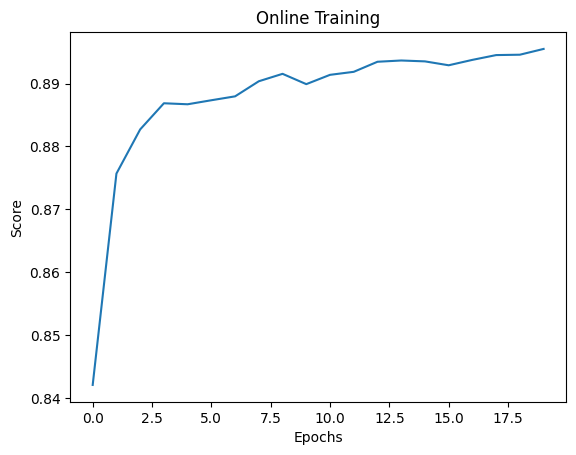

In [13]:
import matplotlib.pyplot as plt
x = [i for i in range(len(history))]
plt.plot(x, history)
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.title("Online Training")

In [14]:
X_valid, Y_valid = valid_set[0], valid_set[1]

In [15]:
def score(X, Y, weights, bias):
    predictions = []
    for i in range(Y.shape[0]):
        activated_output = np.array([0 for _ in range(10)])
        expected_result = np.array([0 for _ in range(10)])
        output = np.dot(X[i], weights) + bias   
        Z = activation(output)
        predictions.append(Z)
    return accuracy(predictions, Y)

In [16]:
score(X_valid, Y_valid, weights, bias)

0.8945

In [17]:
X_test, Y_test = test_set[0], test_set[1]

In [18]:
score(X_test, Y_test, weights, bias)

0.8904